In [3]:
import re

bfs_file = "/Users/sakshmenon/Desktop/PLM/Workflow Gen/Similarity Search/s_cerevisiae2s_pombe.bfs.k30.txt"

def extract_query_and_matches(text):
    text = text.split('\n')[:-1]
    query = text[0].split('\t')[1:]
    top_matches = text[1:]

    return {
        "Query": query,
        "Matches": [{"Score": match.split('\t')[1], "Protein ID": match.split('\t')[2][1:]} for match in top_matches]
    }

match_list = []
with open(bfs_file) as file_obj:
    content = file_obj.read()
    queries = content.split('\n\n')
    for query in queries[1:-1]:
        result = extract_query_and_matches(query)
        match_list.append(result)


In [4]:
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
import matplotlib.pyplot as plt
from scipy.stats import norm

def cluster_top_hits(query_list, n_clusters, num_top_hits=30, clustering_method='kmeans', eps=0.1, min_samples=2):
    results = []
    
    for query in query_list:
        query_id = query['Query']
        matches = query['Matches']

        max_val = max([[float(match['Score'])] for match in matches])
        
        # Extract all the scores as floats
        scores = np.array([[float(match['Score'])/max_val[0]] for match in matches])
        
        # Apply clustering based on the selected method
        if clustering_method == 'kmeans':
            # Using 2 clusters (one for top hits and one for the rest)
            kmeans = KMeans(n_clusters)
            labels = kmeans.fit_predict(scores)
        elif clustering_method == 'dbscan':
            # Using DBSCAN with user-defined eps (neighborhood size) and min_samples
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            labels = dbscan.fit_predict(scores)
        
        # Get the labels for the top hits
        top_hit_scores = scores[:num_top_hits]
        top_hit_labels = labels[:num_top_hits]
        
        # Check if all top hits belong to the same cluster
        all_same_cluster = len(set(top_hit_labels)) == 1
        
        # Store results
        placeholder = kmeans.cluster_centers_
        top_hit_labels = top_hit_labels.tolist(),
        cluster_dist = np.mean(placeholder - kmeans.cluster_centers_[top_hit_labels[0][0]])*3/2

        output = {'Top 1 Match Protein ID' : matches[0]['Protein ID'],
                  'Top 1 Match Score' : matches[0]['Score'],
                  'Top 2 Match Protein ID' : matches[1]['Protein ID'],
                  'Top 2 Match Score' :  matches[1]['Score'],
                  'Top Match Cluster Distance' : cluster_dist,
                  "Confidence Score (%)" : (100 - norm.cdf(cluster_dist) * 100)
                  }

        results.append({query_id[0] : output})
        
    ranks = [[[*results[res].values()][0]['Confidence Score (%)'], res] for res in range(0, len(results))]
    sorted_values = []
    ranks.sort()
    ranks.reverse()
    for rank in ranks:
        sorted_values.append(results[rank[1]])

    return sorted_values, ranks
    # return results


In [5]:
# Cluster Analysis: 
    #     Use clustering techniques (e.g., k-means or DBSCAN) to determine whether the top hits belong to the same cluster. 
    #     If the top hits are tightly clustered, it suggests higher reliability.


import json

results, ranks = cluster_top_hits(match_list, 3, clustering_method='kmeans')

# all queries

json_object = json.dumps(results, indent=4)

with open("cluster_all.json", "w") as outfile:
	outfile.write(json_object)

# 30 sampled queries

sampled_results = results[:10] + results[int(len(results)/2) : int(len(results)/2) + 10]+ results[-10:]

json_object = json.dumps(sampled_results, indent=4)

with open("cluster_sampled.json", "w") as outfile:
	outfile.write(json_object)

/var/folders/h3/pl4_4z116_dcntldrzwpn49w0000gn/T/ipykernel_41876/3422858061.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data, shade=True, color='purple', ax=axes[0])


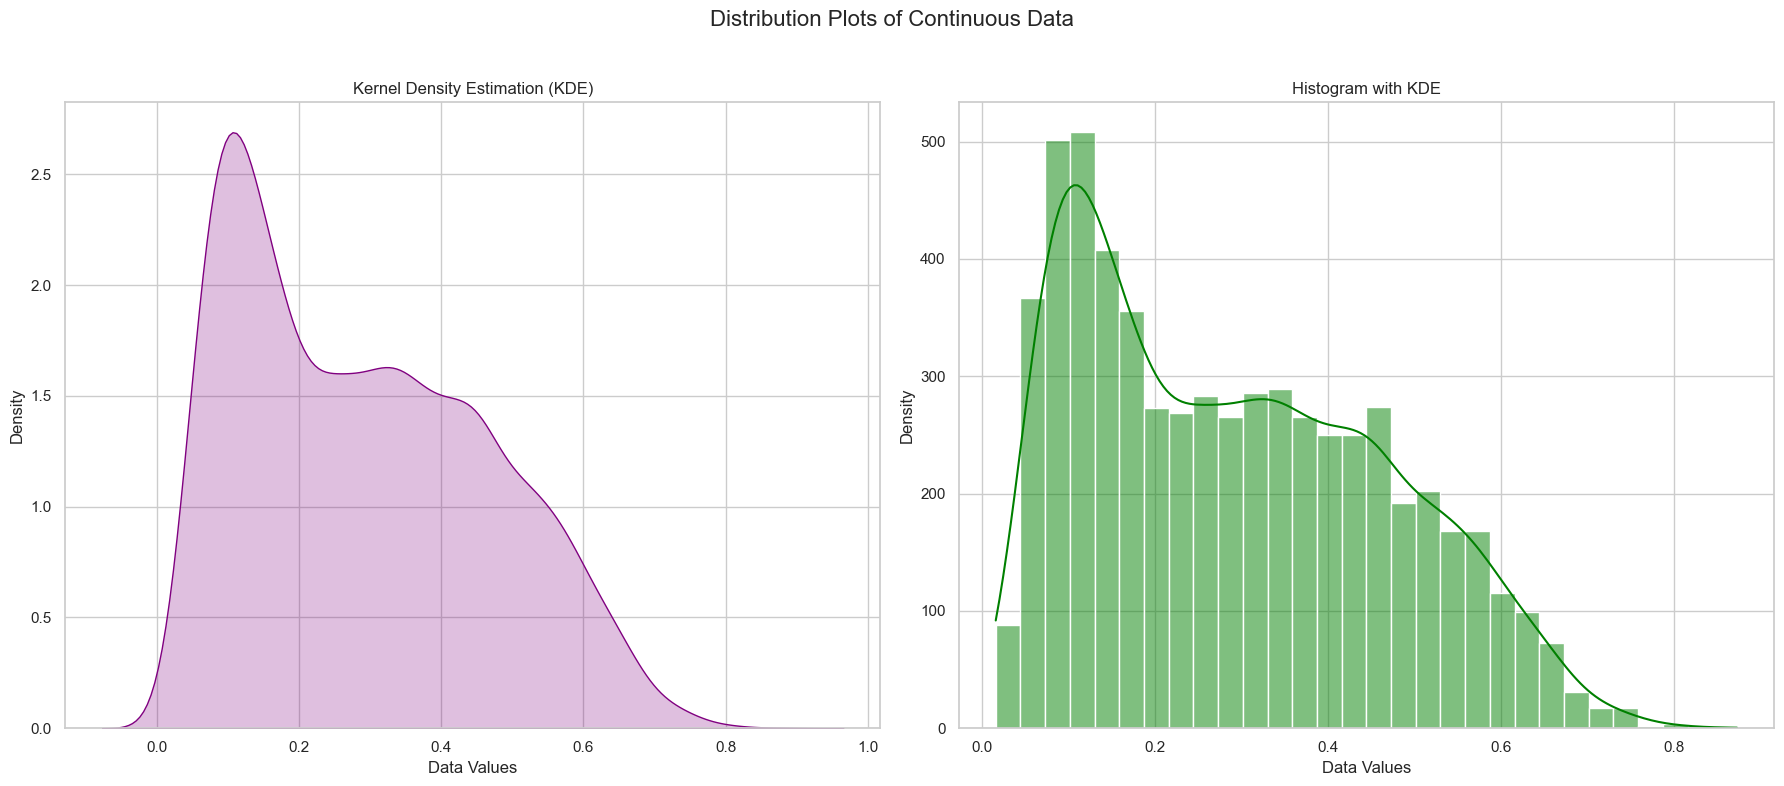

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Generate some sample continuous data
np.random.seed(42)
data = np.random.normal(loc=0, scale=1, size=500)  # Normally distributed data

def plot_distribution(data):
    # Set the style for better aesthetics
    sns.set(style="whitegrid")

    # Create a figure and axes for the subplots
    fig, axes = plt.subplots(1, 2, figsize=(18, 8))

    # KDE Plot
    sns.kdeplot(data, shade=True, color='purple', ax=axes[0])
    axes[0].set_title('Kernel Density Estimation (KDE)')
    axes[0].set_xlabel('Data Values')
    axes[0].set_ylabel('Density')

    # Histogram with KDE overlay
    sns.histplot(data, bins=30, kde=True, color='green', ax=axes[1])
    axes[1].set_title('Histogram with KDE')
    axes[1].set_xlabel('Data Values')
    axes[1].set_ylabel('Density')

    # Display the plots
    plt.suptitle('Distribution Plots of Continuous Data', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit title
    plt.show()

# Call the function to create and display the plots
# data = [i[0] for i in ranks]
data = [[*i.values()][0]['Top Match Cluster Distance'] for i in results]

plot_distribution(data)


[0.015576749402785028,
 0.02264492753623193,
 0.023171424718754774,
 0.025869259812099366,
 0.02649840091601846,
 0.026646185355862717,
 0.02666492901365669,
 0.02773974737839624,
 0.028371994517827903,
 0.030010280599903183,
 0.03027436794560079,
 0.030467025519885393,
 0.030472202837869278,
 0.03058294737921491,
 0.031679169643565985,
 0.032101768862332236,
 0.03260493319885943,
 0.03267316878980897,
 0.03301870748299324,
 0.033254670599803415,
 0.03403001071811357,
 0.034170984455958564,
 0.03434562545191605,
 0.034372093023255834,
 0.03482012639766657,
 0.03496168582375475,
 0.03578415354116288,
 0.03617269001490314,
 0.0365582655826559,
 0.0367731796752227,
 0.03692989864864865,
 0.037115254775805184,
 0.037242503777936864,
 0.03732950466618812,
 0.03751579404564476,
 0.03771965952773204,
 0.03800315340382121,
 0.038100503100503225,
 0.03829515963546376,
 0.038407759798134156,
 0.038771026864172775,
 0.03885537617536633,
 0.03930301332850067,
 0.03956018518518517,
 0.0395601851851